# EECS 504 Problem Set 2

__Please provide the following information__
(e.g. Jason Corso, jjcorso):

[Your first name] [Your last name], [Your UMich uniqname]

__Important__: after you download the .ipynb file, please name it as EECS504_PS2_\<your_uniquename\>_\<your_umid\>.ipynb before you submit it to canvas. Example: EECS504_PS2_adam_01101100.ipynb.

# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In other words, outputs should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).

If you'd like to preview what your notebook will look like when we grade it, follow the directions [here](https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html) for converting the .ipynb notebook into an HTML file. We'll be running a command similar to: 
```
ipython nbconvert --to html EECS_504_PS2.ipynb  
```

# Starting

Run the following code to import the modules and download all the files you'll need.. After your finish the assignment, remember to run all cells and save the note book to your local machine as a .ipynb file for Canvas submission.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from google.colab.patches import cv2_imshow
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import IPython
from __future__ import print_function
import os
import sys
import tarfile
from IPython.display import display, Image
import h5py
from PIL import Image
import random
from urllib.request import urlretrieve
from collections import Counter

In [2]:
! wget -O rings.jpg "https://drive.google.com/uc?export=download&id=1ynsLLvtE5rpFA84gVoWRNjnBsq8-0LIF"
! wget -O red_2.jpg "https://drive.google.com/uc?export=download&id=1r7yEixIiPgSco70o2XAEfbB60d3g0AGN"
! wget -O red_1.jpg "https://drive.google.com/uc?export=download&id=1TfvOPptrkw0MeHfhxy_tuI9o0_PjYvqt"
! wget -O checkerboard.jpg "https://drive.google.com/uc?export=download&id=1lqsfMPQDf96EgmAtNq6jA9jV7jX1Dzlh"
! wget -O sunflowers.png "https://drive.google.com/uc?export=download&id=1GknTI5GT4IQsTp4vlgroGu6dKebJ3fJk"
! wget -O drosophila.png "https://drive.google.com/uc?export=download&id=1tJM9I3_Gt6JWuIp2mcykt_9rewYx6YkQ"
! wget -O circle.png "https://drive.google.com/uc?export=download&id=1YU18BNsAuh1BHEGQ8NQL4IiBTTC1k5Y1"



--2020-10-05 15:54:41--  https://drive.google.com/uc?export=download&id=1ynsLLvtE5rpFA84gVoWRNjnBsq8-0LIF
Resolving drive.google.com (drive.google.com)... 74.125.142.101, 74.125.142.113, 74.125.142.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-bo-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5h7rc7mrd6d7a4o1gd6flkg38utpadsr/1601913225000/14000179195872343522/*/1ynsLLvtE5rpFA84gVoWRNjnBsq8-0LIF?e=download [following]
--2020-10-05 15:54:41--  https://doc-0s-bo-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5h7rc7mrd6d7a4o1gd6flkg38utpadsr/1601913225000/14000179195872343522/*/1ynsLLvtE5rpFA84gVoWRNjnBsq8-0LIF?e=download
Resolving doc-0s-bo-docs.googleusercontent.com (doc-0s-bo-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0s-bo-docs.googleusercontent.com (doc-0s

#Problem 2.1: Local Image Features and Image 

In this problem, you will implement the simplified Harris corner response measure based on the minimum eigenvalue of the structure tensor, as
discussed in class. You will initially work on a checkerboard image as it makes it very easy to predict what the Harris matrix should look like.

#Visualize input image

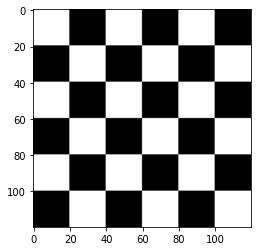

In [3]:
checkerboard = cv2.imread('checkerboard.jpg')/255
plt.imshow(checkerboard, cmap="gray")
plt.show()

#Computing the derivatives of the image ($I_x$ and $I_y$)

We have implemented the function compute_derivatives which takes an image and returns the derivative of the image with respect to x and y

In [4]:
def compute_derivatives(img):
  """Computes derivatives of image using sobel filter. To learn more about sobel 
  filters you can check: https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm"""
  
  Ix = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=1)
  Iy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=1)
  return Ix, Iy
Ix, Iy = compute_derivatives(checkerboard[:,:,0])

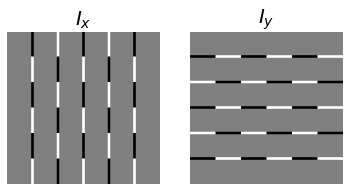

In [5]:
fig, ax = plt.subplots(1, 2)
for a in ax:
  a.set_axis_off()
  ax[0].set_title('$I_x$', fontsize = 20)
  ax[0].imshow(Ix, cmap="gray")
  ax[1].set_title('$I_y$', fontsize = 20)
  ax[1].imshow(Iy, cmap="gray")


#Implement Harris filter 

Now is your turn to implement the harris function. This function will work with grayscale images so don't worry about having to compute the derivative over multiple channels. 

hint: use np.linalg.eig

In [6]:
def harris(Ix, Iy, window_size):
  """ This functions takes the derivatives of a grayscale image and a window size as input.
  The function returns the harris corner response where each pixel corresponds to 
  the minimum eigenvalue of the structure tensor of a window centered at that pixel"""

  output = np.zeros_like(Ix)

  # ===============================================
  # TODO: replace pass with your code
  rows = output.shape[0]
  cols = output.shape[1]

  # Zero-padding of the derivatives of the input image
  Ix_pad = np.zeros((rows+2*(window_size//2), cols+2*(window_size//2)))
  Iy_pad = np.zeros((rows+2*(window_size//2), cols+2*(window_size//2)))
  Ix_pad[window_size//2:rows+window_size//2, window_size//2:cols+window_size//2] = Ix
  Iy_pad[window_size//2:rows+window_size//2, window_size//2:cols+window_size//2] = Iy

  # Implement Structure Tensor H for the input image in coordinate (s,t)
  for s in range(cols):
      for t in range(rows):
          h11 = np.sum(np.square(Ix_pad)[s:s+window_size, t:t+window_size])
          h12 = np.sum(np.multiply(Ix_pad, Iy_pad)[s:s+window_size, t:t+window_size])
          h22 = np.sum(np.square(Iy_pad)[s:s+window_size, t:t+window_size])
          
          # calculate smaller eigenvalue of H
          w,_ = np.linalg.eig(np.array([[h11,h12],[h12,h22]]))
          output[s,t] = w.min()
            
  # ===============================================
        
  return output   

#Visualize harris response of checkerboard pattern (window size of 3)

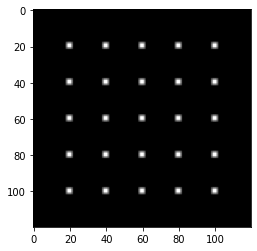

In [7]:
corners = harris(Ix, Iy, 3)
plt.imshow(corners, cmap = "gray")
plt.show()

# Detecting corners from Harris corner response

The next step is to use thresholding and Non-maximal Supression to select our corners detections from our harris matrix. We have implemented this function but feel free to go through the implementation to understand what is happening.

In [8]:
def corner_detections(harris_matrix,radius, thresh):
  rows, cols = harris_matrix.shape
  window_size = radius*2 + 1
  kernel = np.ones((window_size, window_size))

  iterations = window_size**2
  dilated = cv2.dilate(harris_matrix,kernel, iterations)
  bordermask = np.zeros_like(harris_matrix)
  bordermask[radius:-radius, radius:-radius] = 1
  maxima = np.logical_and(np.logical_and(harris_matrix == dilated, harris_matrix > thresh), bordermask)
  detections = np.where(maxima)
 
  return detections


def draw_detections(img, detections, cross_halfsize = 3):

  image = img.copy()
  rows, cols = detections


  for row, col in zip(rows, cols):
    start_point = (row - cross_halfsize, col)
    end_point = (row + cross_halfsize, col)
    color = (1, 0, 0) 
    thickness = 1
    img = cv2.line(image, start_point, end_point, color, thickness) 
    start_point = (row, col - cross_halfsize)
    end_point = (row, col + cross_halfsize)
    img = cv2.line(image, start_point, end_point, color, thickness) 
    
    
  plt.imshow(img)



# Visualize corner detections

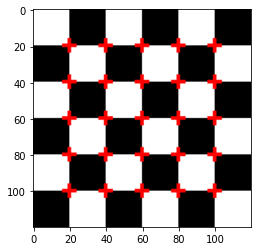

In [9]:
detections = corner_detections(corners,1, 0.2)
draw_detections(checkerboard, detections)

#Problem 2.3

# Visualize input image

Original image


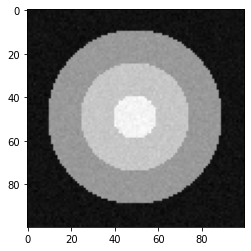

Harris corner matrix


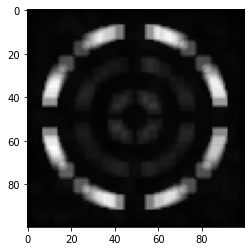

Feature detections


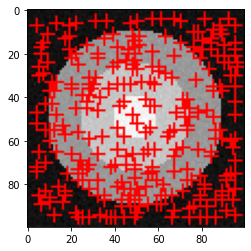

In [10]:
print("Original image")
rings_colored = cv2.imread('rings.jpg')/255
rings = rings_colored[:,:,0]
plt.imshow(rings_colored[:,:,:])
plt.show()

print("Harris corner matrix")
Ix, Iy = compute_derivatives(rings)
harris_rings = harris(Ix, Iy, 7)
plt.imshow(harris_rings, cmap = "gray")
plt.show()

print("Feature detections")
detections = corner_detections(harris_rings,1, 0.01)
draw_detections(rings_colored, detections)

There are too many bad detections in our concentric circles! Figure out a way to improve this result to get corners only on the
boundaries. You can modify your rings image and the corresponding harris response in any way you want. You CANNOT modify our corner_detections function in any way (that includes not changing the threshold value). 

Hint: is there a way to reduce the noise in the rings image

In [13]:
# ===============================================
# TODO: replace pass with your code

rings_modified = cv2.GaussianBlur(rings_colored, (3,3), 0)
Ix_, Iy_ = compute_derivatives(rings_modified[:,:,0])

harris_modified = harris(Ix_, Iy_, 7)

# ===============================================

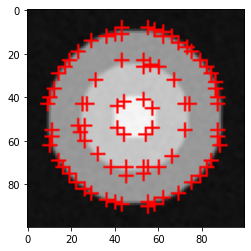

In [14]:
detections = corner_detections(harris_modified,1, 0.01)
draw_detections(rings_modified, detections)

#Problem 2.4

For this problem we will do image stitching for two images of a red house. The entire implementation has been done for you but feel free to look through the code. 

Instead of using harris corners for features we will be using ORB feature. Some of the advantages of these features can be found at https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf. We then find the correspondences between the features of both images. Finally, we use this homography to overlay the right image on top of the left one.

#Visualize input images

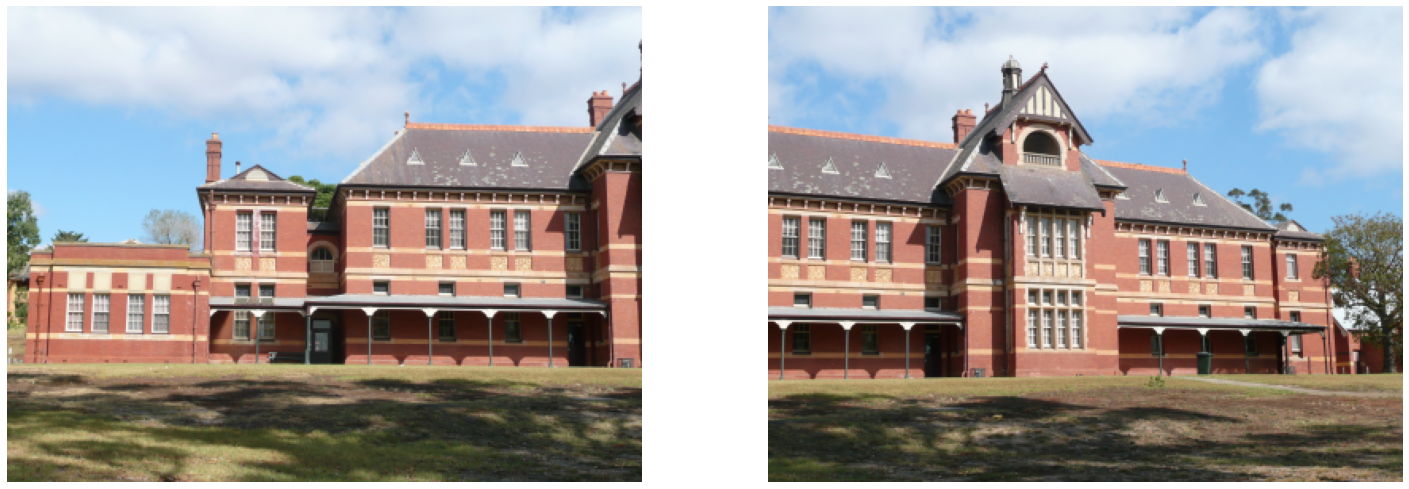

In [15]:
red_1 = plt.imread('red_1.jpg')
red_2 = plt.imread('red_2.jpg')

red_1 = cv2.resize(red_1,(400, 300))
red_2 = cv2.resize(red_2,(400, 300))

fig, ax = plt.subplots(1, 2, figsize=(25, 25))
for a in ax:
  a.set_axis_off()
  ax[0].imshow(red_1)
  ax[1].imshow(red_2)

In [16]:
def get_orb_features(img):
  '''
    Compute ORB features using cv2 library functions. Use default parameters when computing the keypoints.
    Input: 
      img: cv2 image
    Returns:
      keypoints: a list of cv2 keypoints
      descriptors: a list of ORB descriptors
  '''
  # ===============================================
  # Initiate ORB detector
  orb = cv2.ORB_create()
  # find the keypoints with ORB
  kp = orb.detect(img,None)
  # compute the descriptors with ORB
  kp, des = orb.compute(img, kp)
  # ===============================================
  return kp, des

def match_keypoints(desc_1, desc_2):
  '''
    Compute matches between feature descriptors of two images using Lowe's ratio test. 
    You may use cv2 library functions.
    Input:
      desc_1, desc_2: list of feature descriptors
    Return:
      matches: list of feature matches
  '''
  # ===============================================
 # create BFMatcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

  # Match descriptors.
  matches = bf.match(desc_1,desc_2)

  # Sort them in the order of their distance.
  matches = sorted(matches, key = lambda x:x.distance)


  # ===============================================
  return matches

keypoints for img1 and img2


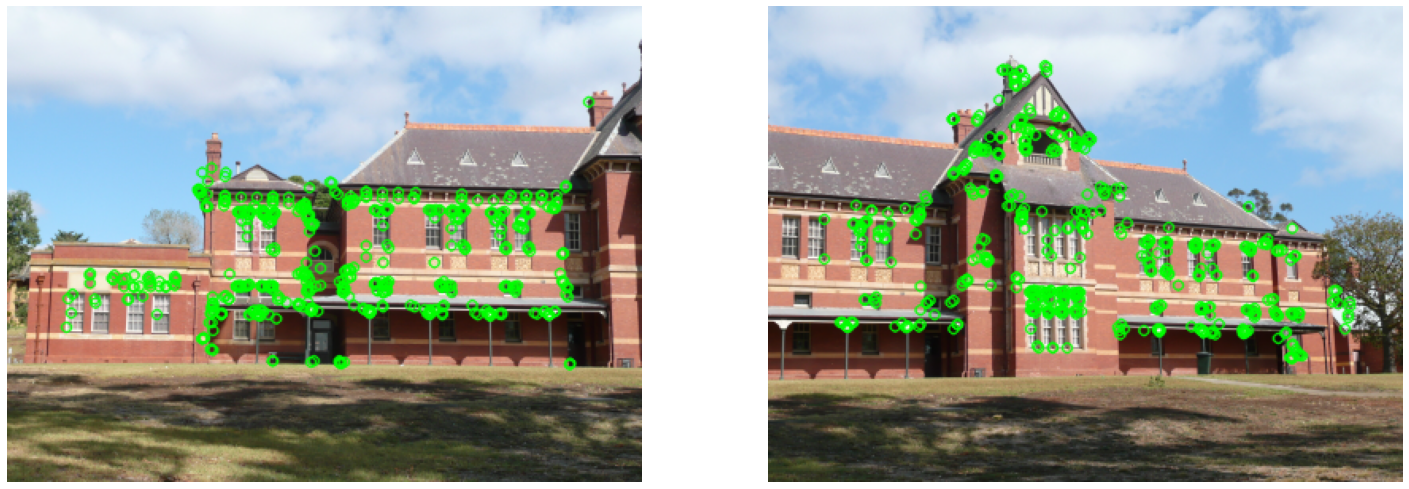

In [17]:
kp_1, desc_1 = get_orb_features(red_1)
kp_2, desc_2 = get_orb_features(red_2)

kp_img1 = cv2.drawKeypoints(red_1, kp_1, None, color=(0,255,0), flags=0)
kp_img2 = cv2.drawKeypoints(red_2, kp_2, None, color=(0,255,0), flags=0)

print('keypoints for img1 and img2')
fig, ax = plt.subplots(1, 2, figsize=(25, 25))
for a in ax:
  a.set_axis_off()
  ax[0].imshow(kp_img1)
  ax[1].imshow(kp_img2)


orb best 20 feature matches


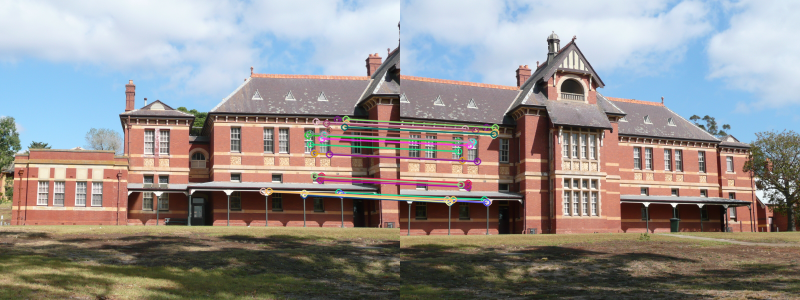

In [18]:
matches = match_keypoints(desc_1, desc_2)
match_plot = cv2.drawMatches(red_1, kp_1, red_2, kp_2, matches[:30], None, flags=2)
match_plot = cv2.cvtColor(match_plot, cv2.COLOR_BGR2RGB)
print("orb best 20 feature matches")
cv2_imshow(match_plot)

In [19]:
def proj(H, pts_2):
    
    H = np.reshape(H, (3,3))
    N = pts_2.shape[0]
    h_pts_2 = np.append(pts_2, np.ones((N,1)), axis = 1)
    proj = H@h_pts_2.T
    proj /= proj[2, :]
    proj = proj[:2, :].T
    return proj

In [20]:
def find_homography(pts_1, pts_2):
  '''
    Use either nonlinear least squares or direct linear transform 
    to find a homography that estimates the transformation mapping from pts_1 to pts_2.
    e.g. If x is in pts_1 and y is in pts_2, then y = H * x
    Hint: The objective function to optimize here is: ||pts_1 - cart(H*homog(pts_2))||^2 
    where homog(x) converts x into homogeneous coordinates and cart(x) converts x to cartesian coordinates.
    Input:
      pts_1, pts_1: (N, 2) matrix 
    Return:
      H: the resultant homography matrix (3 x 3)
  '''

  N = pts_1.shape[0]
  A = np.zeros((2*N,9))

  for i in range(N):
    A[i*2, :] = [-pts_2[i, 0], -pts_2[i, 1], -1, 0, 0, 0, pts_1[i,0]*pts_2[i,0],pts_1[i,0]*pts_2[i,1], pts_1[i,0]]
    A[i*2+1,:] = [0, 0, 0, -pts_2[i, 0], -pts_2[i, 1], -1, pts_2[i,0]*pts_1[i,1],pts_2[i,1]*pts_1[i,1], pts_1[i,1]]


  
  U,S,V = np.linalg.svd(A)
  H = V[8]/V[8,-1]
  H = H.reshape((3,3))

  return H

In [21]:
def panoramic_stitching(img1, img2, num_matches):
  '''
    Given a pair of overlapping images, generate a panoramic image. 
    Hint: use the functions that you've written in the previous parts.
    Hint: you may use OpenCV function to apply perspective wrapping.
    Input: 
      img1, img2: cv2 images
    Return:
      final_img: cv2 image of panorama
  '''

  kp_1, desc_1 = get_orb_features(img1)
  kp_2, desc_2 = get_orb_features(img2)
  matches = match_keypoints(desc_1, desc_2)
  matches = matches[:num_matches]
  pts_1 = np.array([list(kp_1[match.queryIdx].pt) for match in matches])
  pts_2 = np.array([list(kp_2[match.trainIdx].pt) for match in matches])
  H = find_homography(pts_1, pts_2)
  final_img = cv2.warpPerspective(img2, H, (img2.shape[1]+img1.shape[1], img2.shape[0])) 
  final_img[0:img1.shape[0], 0:img1.shape[1]] = img1


  return final_img

#Stitch images 

Panorama stitching with 4 matches


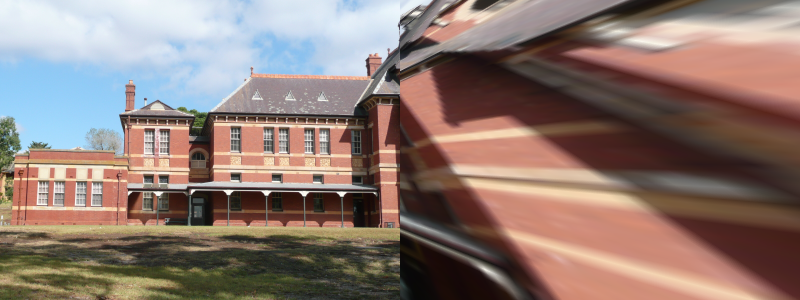

Panorama stitching with 20 matches


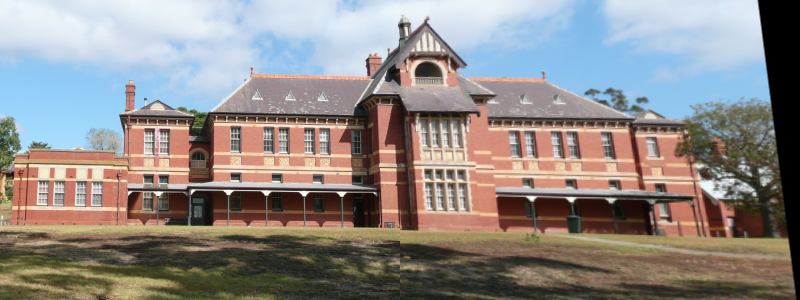

Panorama stitching with 30 matches


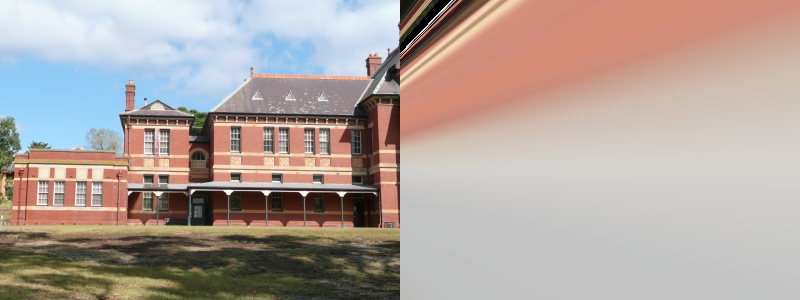

In [22]:
print("Panorama stitching with 4 matches")
result = panoramic_stitching(red_1, red_2,4)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2_imshow(result)

print("Panorama stitching with 20 matches")
result = panoramic_stitching(red_1, red_2,20)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2_imshow(result)

print("Panorama stitching with 30 matches")
result = panoramic_stitching(red_1, red_2,30)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2_imshow(result)

#Problem 3: DoG Blob Detection and Scale Selection

In this section we will build a blob detector using what you learned in class. You will implement the function DoGScaleSpace that build a difference of gaussian scale space representation of an image.

Important: the difference of gaussians of an image already approximates the scale normalized laplacian of gaussian of that image so there is no need to multiply by sigma^2. You can read about the relationsihp between DoG and LoG in this link: http://www.cse.yorku.ca/~kosta/CompVis_Notes/DoG_vs_LoG.pdf.

#Visualizing images

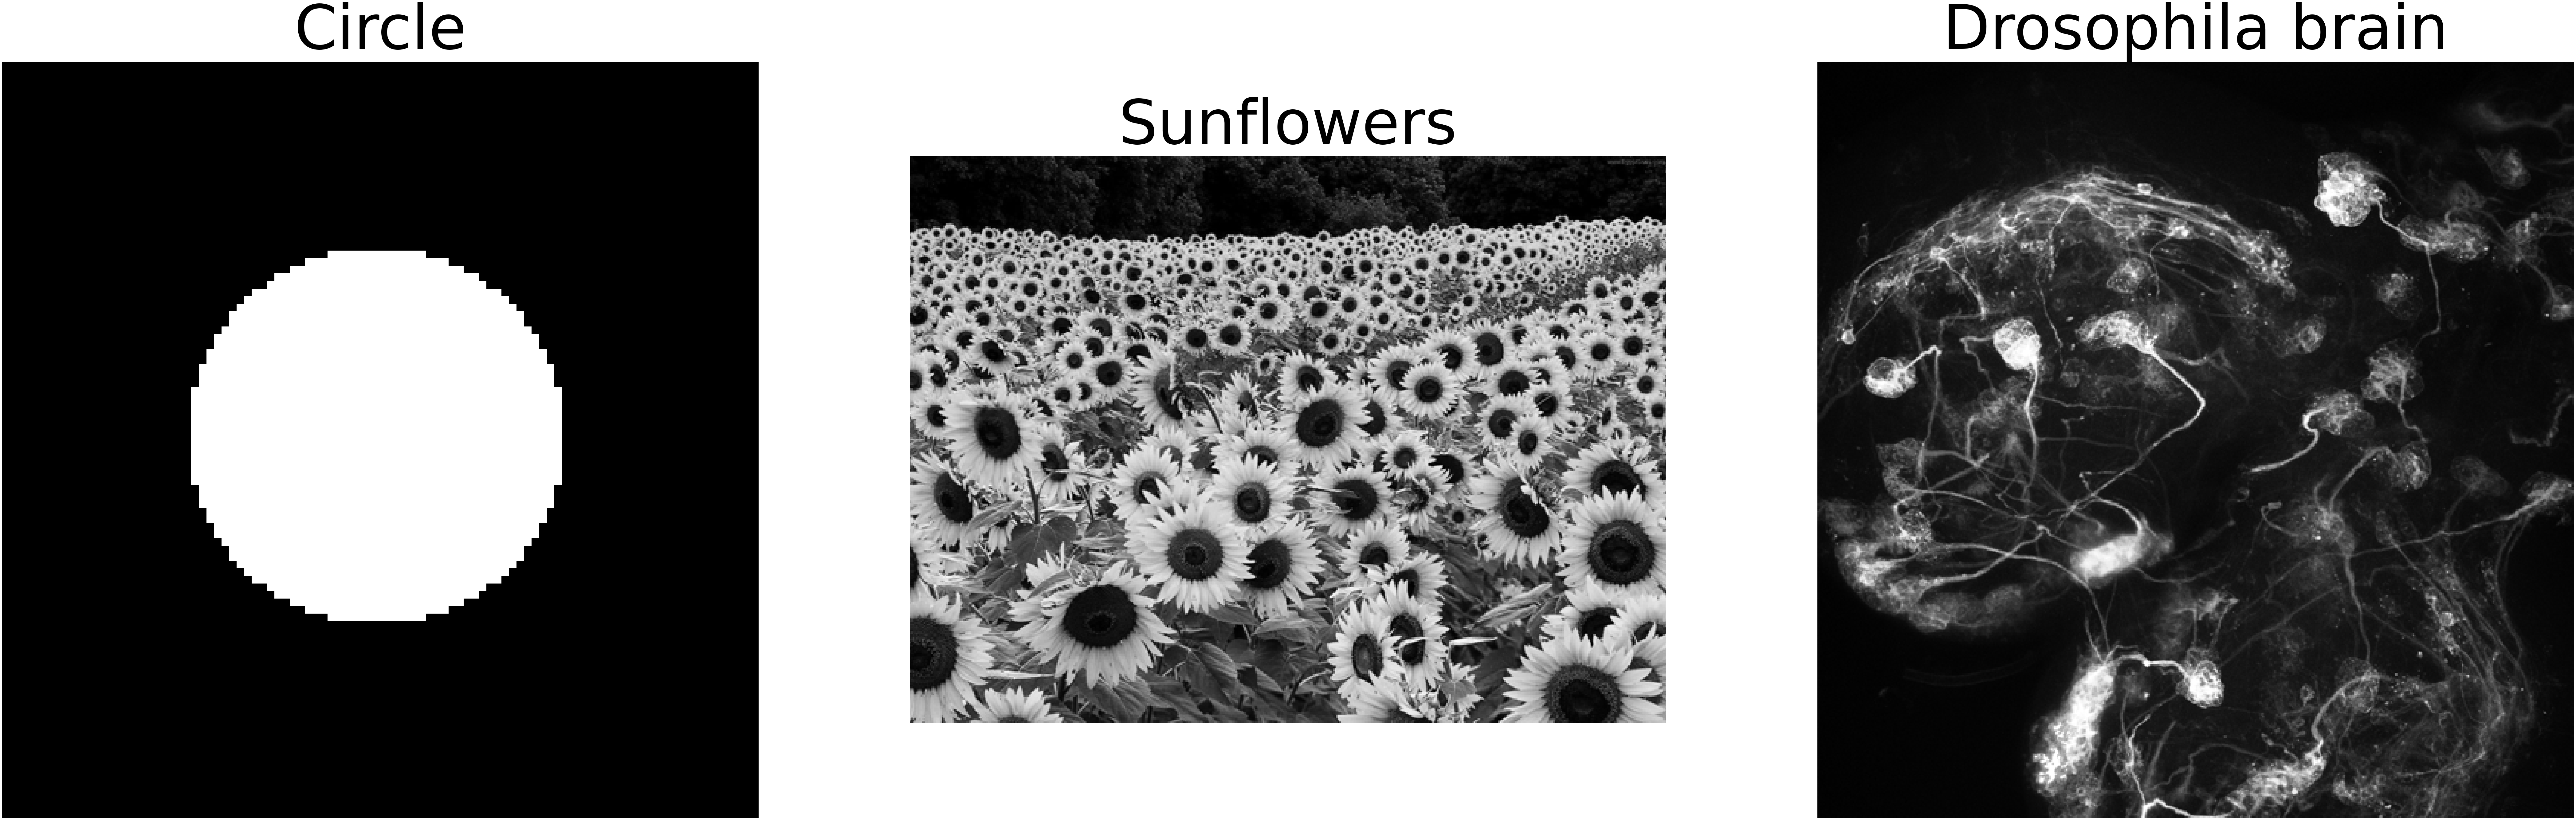

In [23]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

circle = plt.imread('circle.png')
circle_colored = circle
circle = rgb2gray(circle)

sunflowers = plt.imread('sunflowers.png')
sunflowers_colored = sunflowers
sunflowers = rgb2gray(sunflowers)

drosophila = plt.imread('drosophila.png')
drosophila_colored = drosophila
drosophila = rgb2gray(drosophila)

fig, ax = plt.subplots(1, 3, figsize=(150, 200))
for a in ax:
  a.set_axis_off()
  ax[0].set_title('Circle', fontsize=200)
  ax[0].imshow(circle, cmap="gray")
  ax[1].set_title('Sunflowers', fontsize=200)
  ax[1].imshow(sunflowers , cmap="gray")
  ax[2].set_title('Drosophila brain', fontsize=200)
  ax[2].imshow(drosophila, cmap="gray")

#Implement the DoG Scale Space

hint: use cv2.GaussianBlur (this function will compute the kernel size automatically if you pass a size of [0 0])

In [24]:
def DoGScaleSpace(im,levels):

  #The sigma values for the gaussian blur of every level are given to you below
  k  = np.sqrt(2)
  sigma_0 = 1.6*k
  sigmas = np.cumprod([sigma_0] + [k]*levels)
  scaleSpace = np.zeros((im.shape[0],im.shape[1], levels))

  # ===============================================
  # TODO: replace pass with your code

  # Given 'levels', DoG ScaleSpace should output 'levels+2' images for the local extrema detection at the top/bottom of the levels.
  for level in range(levels):
    scaleSpace[:,:,level] = cv2.GaussianBlur(im, (0,0), sigmas[level+1])-cv2.GaussianBlur(im, (0,0), sigmas[level])

  # ===============================================

  return scaleSpace


#Visualize DoG scale spaces

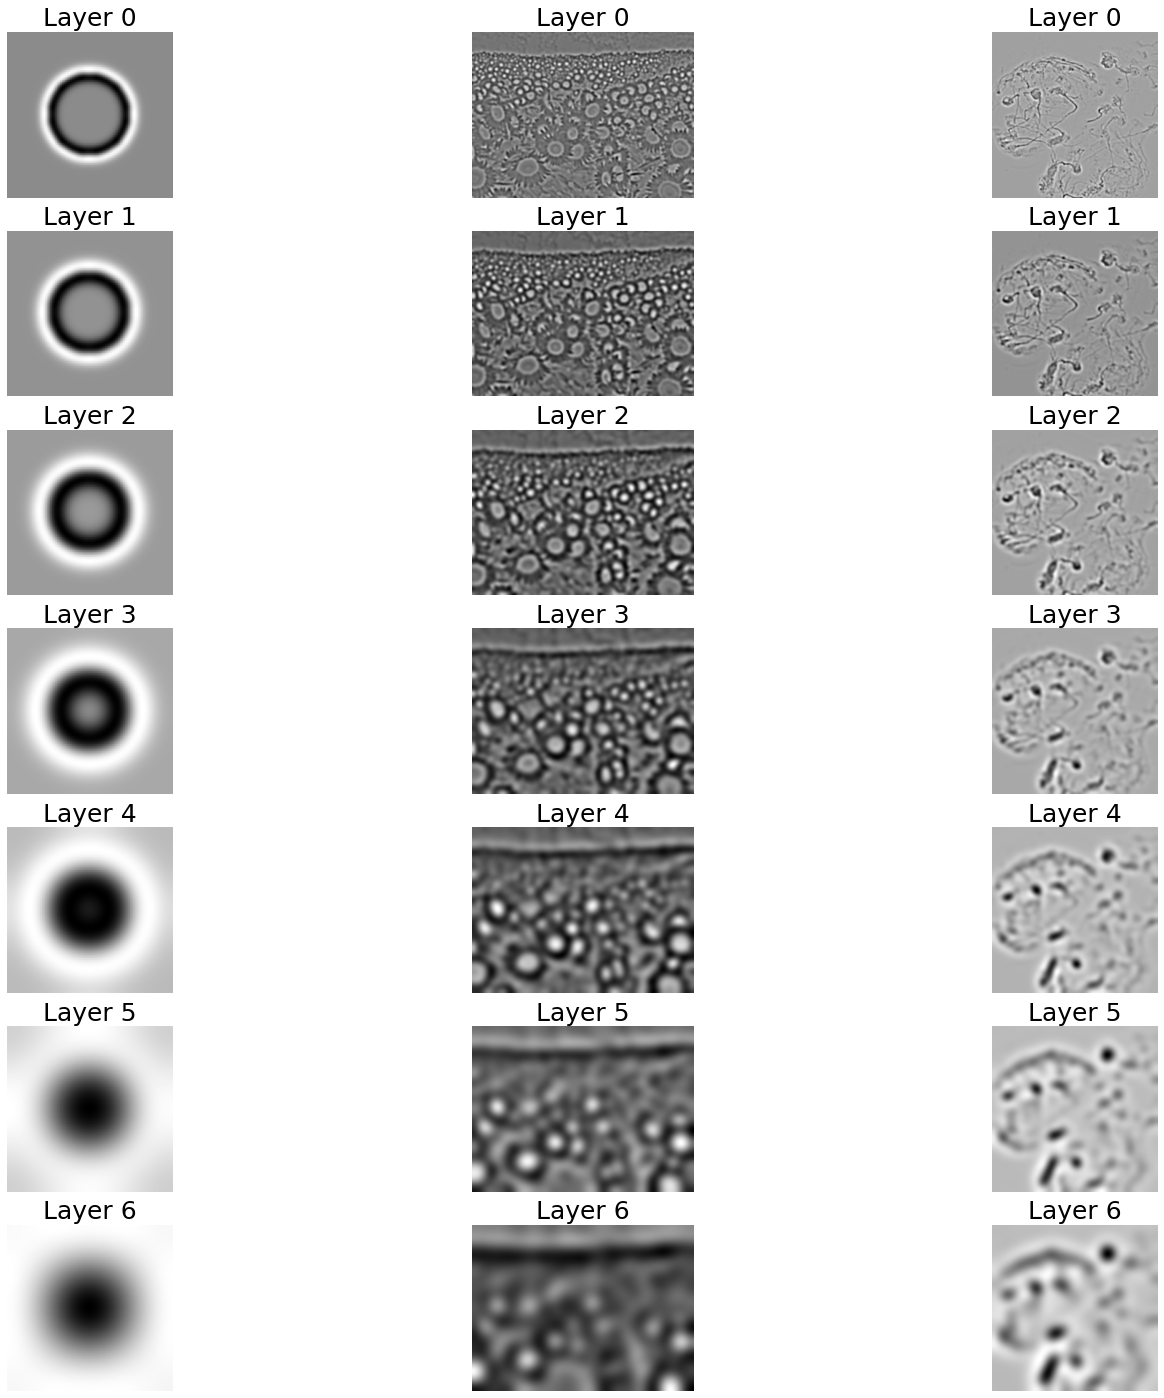

In [25]:
circleSpace = DoGScaleSpace(circle,7)
sunflowerSpace = DoGScaleSpace(sunflowers,7)
drosophilaSpace = DoGScaleSpace(drosophila,7)

fig, ax = plt.subplots(7, 3, figsize=(25, 25))

spaces = [circleSpace, sunflowerSpace, drosophilaSpace ]

levels, num_spaces = ax.shape

for row in range(levels):
  for col in range(num_spaces):
    ax[row][col].set_axis_off()
    ax[row][col].set_title('Layer ' + str(row), fontsize=25)
    ax[row][col].imshow(spaces[col][:,:,row], cmap="gray")



#Find local extrema in scale spaces

In [45]:
def find_local_extrema(scaleSpace):

  """This functions takes a scale space of size (image rows, image cols, levels) 
  as input and should output the position of local extrema. The level on top and
  below an image should be considered when computing this extrema.

  The image shown in the pdf with the "Too many detections" scenario was found 
  for the local extrema of the scale space, WITHOUT SQUARING THE SCALE SPACE. Although
  you can square the scale space if you want and the final output (after applying filterBlobs)
  wouldn't change too much.
  
  The output of the function (extrema) should be a list of tuples where every 
  tuple consists of (row, col, level)"""

  extrema = []
  # ===============================================
  # TODO: replace pass with your code
  rows = scaleSpace.shape[0]
  cols = scaleSpace.shape[1]
  levels = scaleSpace.shape[2]

  # min/max padding
  # For local minima, pad boundaries with the number larger than any other value in scale space
  scalespace_min = np.full((rows+2,cols+2,levels), scaleSpace.max()+1)
  scalespace_min[1:-1, 1:-1, :] = scaleSpace[:,:,:]

  # For local maxima, pad boundaries with the number smaller than any other value in scale space
  scalespace_max = np.full((rows+2,cols+2,levels), scaleSpace.min()-1)
  scalespace_max[1:-1, 1:-1, :] = scaleSpace[:,:,:]

  # Search scalespace for the extrema
  # In practice, the scalespace should have more levels beyond the top/bottom levels for extrema detection in those levels, but that is simplified here.
  for level in range(levels):
      for row in range(rows):
          for col in range(cols):
              if level == 0:
                  # bottom level
                  if scaleSpace[row, col, level] == scalespace_min[row:row+3, col:col+3, :2].min():
                      extrema.append((row,col,level))
                  elif scaleSpace[row, col, level] == scalespace_max[row:row+3, col:col+3, :2].max():
                      extrema.append((row,col,level))
              elif level == (levels-1):
                  # top level
                  if scaleSpace[row, col, level] == scalespace_min[row:row+3, col:col+3, -2:].min():
                      extrema.append((row,col,level))
                  elif scaleSpace[row, col, level] == scalespace_max[row:row+3, col:col+3, -2:].max():
                      extrema.append((row,col,level))
              else:
                  # levels in between
                  if scaleSpace[row, col, level] == scalespace_min[row:row+3, col:col+3, level-1:level+2].min():
                      extrema.append((row,col,level))
                  elif scaleSpace[row, col, level] == scalespace_max[row:row+3, col:col+3, level-1:level+2].max():
                      extrema.append((row,col,level))
  # ===============================================
  return extrema

#Visualize scale space extrema

This could take a long time

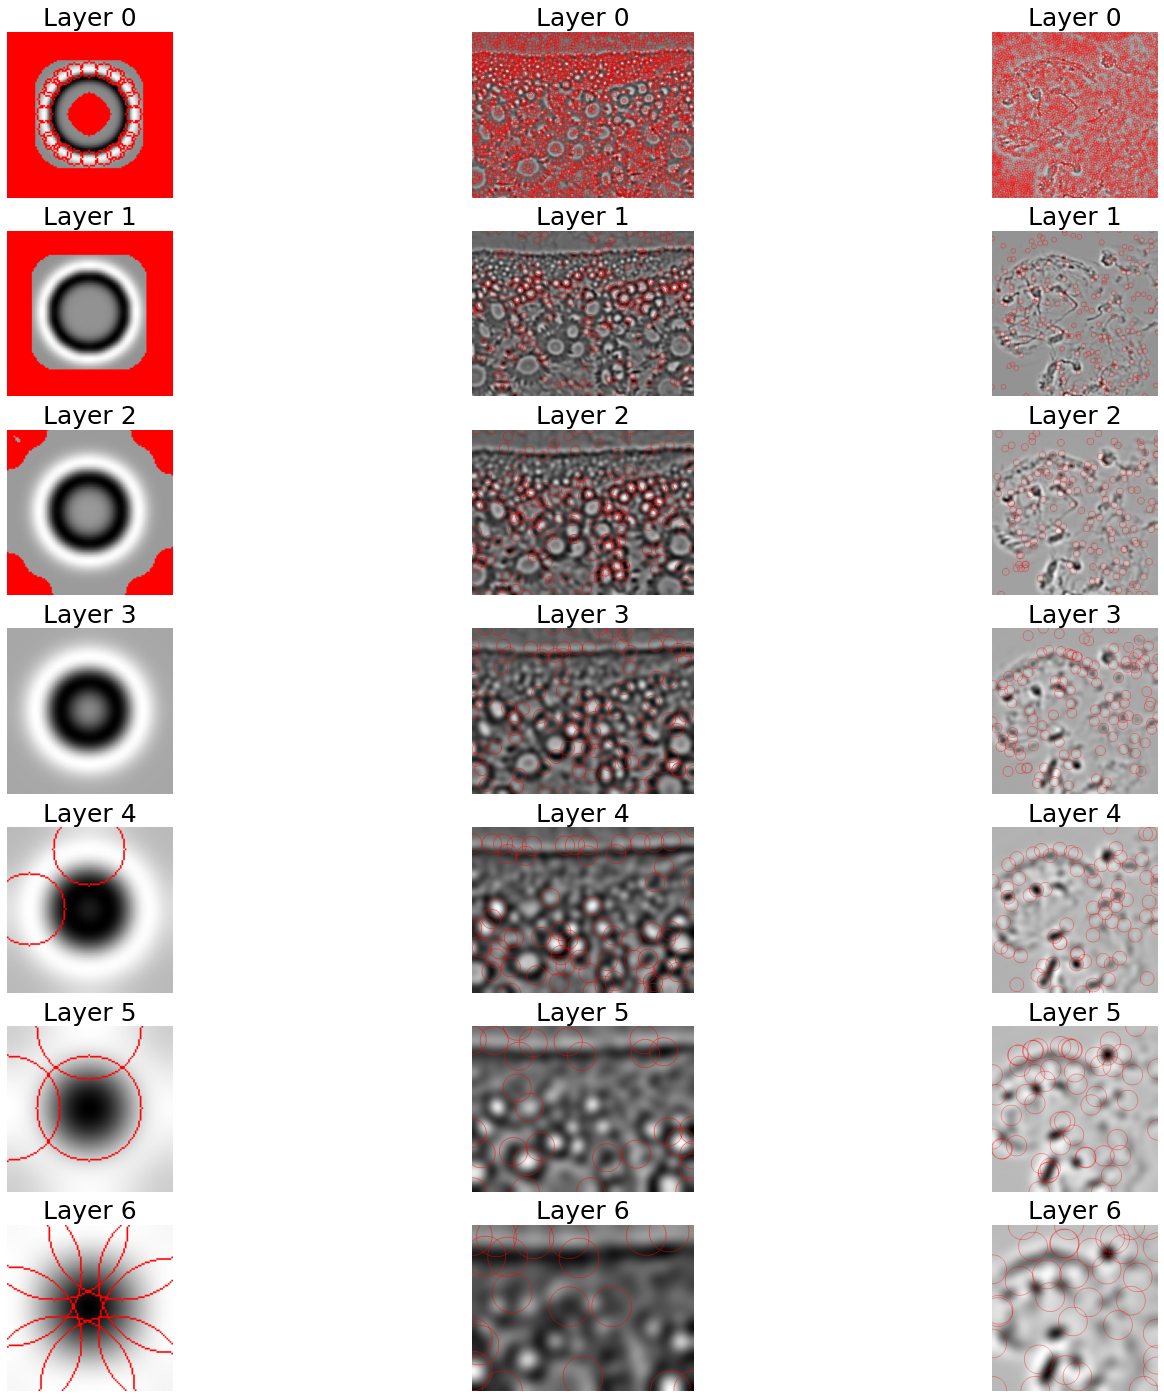

In [46]:
def overlaySpaceExtrema(scaleSpace, extrema):

  k  = np.sqrt(2)
  s1 = 1.6*k
  sigmas = np.cumprod([s1] + [k]*7)

  rows, cols, levels = scaleSpace.shape
  scaleSpaceExtrema = np.zeros((rows, cols, 3, levels))

  for level in range(levels):
    norm = cv2.normalize(scaleSpace[:,:, level], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    norm = cv2.cvtColor(norm, cv2.COLOR_GRAY2BGR)
    scaleSpaceExtrema[:,:,:,level] = norm/255

    
  for (row, col, level) in extrema:
    center_coordinates = (col, row)
    color = (1,0,0)
    radius = int(2.5*sigmas[level])
    thickness = 1
    scaleSpaceExtrema[:, :,:, level] = cv2.circle(scaleSpaceExtrema[:, :,:, level].astype('float'), center_coordinates, radius, color, thickness)


  return scaleSpaceExtrema



#circle

circle_extrema = find_local_extrema(circleSpace)
circleSpaceExtrema = overlaySpaceExtrema(circleSpace, circle_extrema)

#sunflowers

sunflower_extrema = find_local_extrema(sunflowerSpace)
sunflowerSpaceExtrema = overlaySpaceExtrema(sunflowerSpace, sunflower_extrema)

#drosophila

drosophila_extrema = find_local_extrema(drosophilaSpace)
drosophilaSpaceExtrema = overlaySpaceExtrema(drosophilaSpace, drosophila_extrema)

fig, ax = plt.subplots(7, 3, figsize=(25, 25))


spaces = [circleSpaceExtrema, sunflowerSpaceExtrema, drosophilaSpaceExtrema]

levels, num_spaces = ax.shape

for row in range(levels):
  for col in range(num_spaces):
    ax[row][col].set_axis_off()
    ax[row][col].set_title('Layer ' + str(row), fontsize=25)
    ax[row][col].imshow(spaces[col][:,:,:,row], cmap="gray")




Circle detections


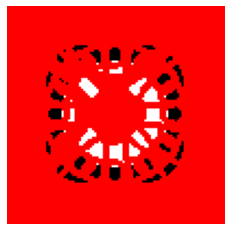

Sunflower detections


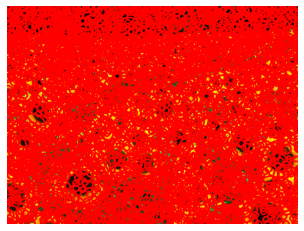

Drosophila detections


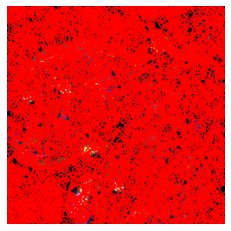

In [47]:
def overlayDetectionsOnOriginal(img, extrema):

  k  = np.sqrt(2)
  s1 = 1.6*k
  sigmas = np.cumprod([s1] + [k]*7)

  detections = img.copy()
  for (row, col, level) in extrema:
    center_coordinates = (col, row)
    color = (1,0,0, 1)
    radius = int(2.5*sigmas[level])
    thickness = 2
    detections = cv2.circle(detections.astype('float'), center_coordinates, radius, color, thickness)
  return detections


circle_detections = overlayDetectionsOnOriginal(circle_colored, circle_extrema)
sunflowers_detections = overlayDetectionsOnOriginal(sunflowers_colored, sunflower_extrema)
drosophila_detections = overlayDetectionsOnOriginal(drosophila_colored, drosophila_extrema)

plt.axis('off')
print("Circle detections")
plt.imshow(circle_detections)
plt.show()
plt.axis('off')
print("Sunflower detections")
plt.imshow(sunflowers_detections)
plt.show()
plt.axis('off')
print("Drosophila detections")
plt.imshow(drosophila_detections)
plt.show()


#Filter detections

There are too many false detection! Next, you will implement the function filterBlobs where you figure out a way to filter the number of blob detections. You will have to filter out blobs that have a DoG response magnitude smaller than a certain threshold (DoGtau), whose
value has been provided for fairness. Optionally, it needs to filter out regions that do not resemble blob regions. If you carefully
inspect the extrema points from the question above, you will find that extrema in the 2D DoG scale space are present in many
places other than blobs.

In [48]:
def filterBlobs(scaleSpace, DoGtau, extrema):

  """This functions filters the list of extrema that you obtained previously.
  It takes a threshold value as input and should output a list of extrema.
  This list should contain tuples where every 
  tuple consists of (row, col, level)"""

  filtered_extrema = []
  # ===============================================
  # TODO: replace pass with your code
  for ext in extrema:
    row, col, level = ext[0], ext[1], ext[2]
    if (abs(scaleSpace[row, col, level]) >= DoGtau):
        filtered_extrema.append(ext)
  # ===============================================
  return filtered_extrema

Circle detections


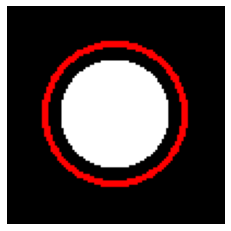

Sunflower detections


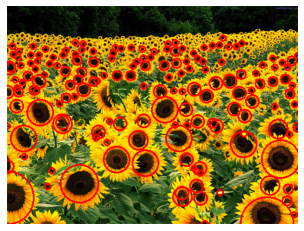

Drosophila detections


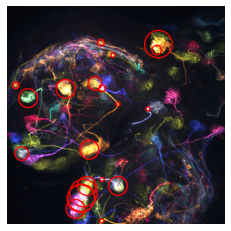

In [49]:
filtered_circle_extrema = filterBlobs(circleSpace, 0.11, circle_extrema)
filtered_sunflowers_extrema = filterBlobs(sunflowerSpace, 0.1, sunflower_extrema)
filtered_drosophila_extrema = filterBlobs(drosophilaSpace, 0.1, drosophila_extrema)


filtered_circle_detections = overlayDetectionsOnOriginal(circle_colored, filtered_circle_extrema)
filtered_sunflowers_detections = overlayDetectionsOnOriginal(sunflowers_colored, filtered_sunflowers_extrema)
filtered_drosophila_detections = overlayDetectionsOnOriginal(drosophila_colored, filtered_drosophila_extrema)


plt.axis('off')
print("Circle detections")
plt.imshow(filtered_circle_detections)
plt.show()
plt.axis('off')
print("Sunflower detections")
plt.imshow(filtered_sunflowers_detections)
plt.show()
plt.axis('off')
print("Drosophila detections")
plt.imshow(filtered_drosophila_detections)
plt.show()




#Problem 4: MNIST Number Classification (Optional: +20 bonus points)

For this problem you will build a KNN classifier for the MNIST dataset. This question is optional with up to +20 points). To learn more about how to implement a KNN classifier you can visit: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761.

You will train on part of the KNN dataset and test on a different portion of it. 




#Load data

In [50]:
mnist = fetch_openml('mnist_784', cache=False)

x_train = mnist.data.astype('float32')[:2000]/255
y_train = mnist.target.astype('int64')[:2000]

x_test = mnist.data.astype('float32')[2000:2500]/255
y_test = mnist.target.astype('int64')[2000:2500]


#Normalize data

implement the function normalize_data. How would you normalize your x_test matrix given that you are training on x_train?

In [51]:
def zero_mean(x_train, x_test):
  """ Return zero mean versions of x_train and x_test. Be careful of how you 
  normalize x_test given that you are training on x_train"""
  x_train_norm = None
  x_test_norm = None
  # ===============================================
  # TODO: replace pass with your code
  mean_train = np.average(x_train, axis=0)

  x_train_norm = x_train - mean_train
  x_test_norm = x_test - mean_train
  # ===============================================
  return x_train_norm, x_test_norm

In [52]:
x_train_norm, x_test_norm = zero_mean(x_train, x_test)

Implement the function compute_basis which calculates n eigenvectors corresponding to the highest n eigenvalues of the covariance matrix of the input

#Compute new basis

In [53]:
def compute_basis(data, n=300):
  """This functions computes the top n eigenvectors of the covariance matrix of 
  data and returns it """
  eigenvectors = None
  # ===============================================
  # TODO: replace pass with your code
  
  # data: x_train (2000, 784)
  # form the covariance matrix Covar from the N^2 x M matrix A
  A = np.transpose(data)
  Covar = np.matmul(A, data)

  # calculate eigenvectors
  w, v = np.linalg.eig(Covar)

  # extract top 'n' eigenvalues and associated eigenvectors
  ind_sorted = np.argsort(w)[::-1][:n]
  eigenvectors = v[:,ind_sorted]
  # ===============================================
  return eigenvectors


#Visualize eigenvectors 

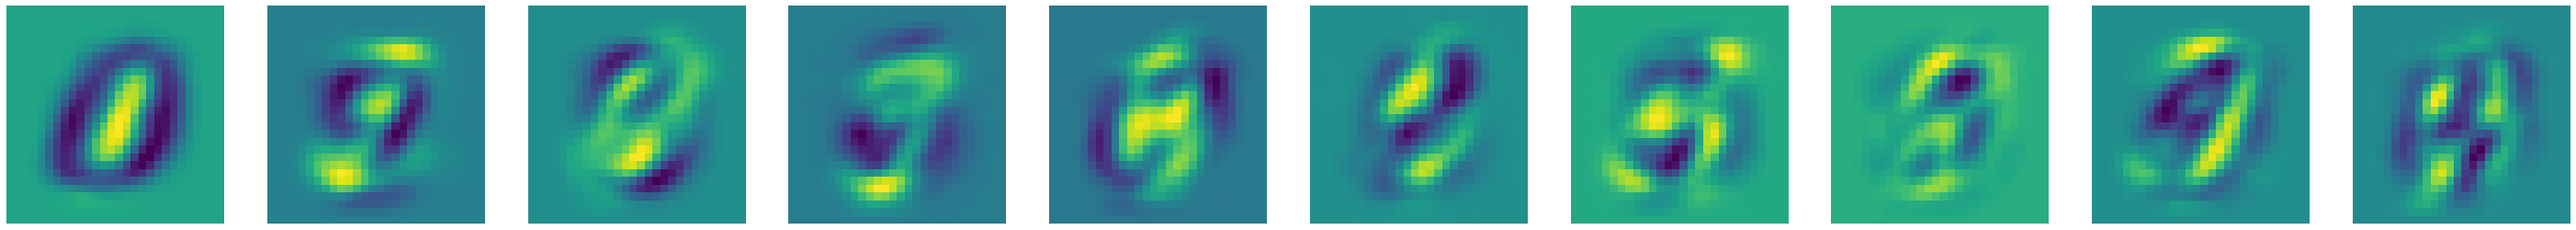

In [54]:
eigenvectors = compute_basis(x_train_norm)
fig, ax = plt.subplots(1,10, figsize=(50,50))
for a in ax:
  for i in range(10):
    a.set_axis_off()
    ax[i].imshow(np.reshape(eigenvectors[:,i], (28,28)))
    

#Change basis of dataset

Implement the function change_basis which changes the basis of data_matrix to be a group of eigenvectors 

In [55]:
def change_basis(data_matrix, eigenvectors):
  """ This function will change the basis of data_matrix.
  The output should be a data_matrix with the eigenvectors as a new basis
  The output would have a size of (N,V) where N is the number of examples in
  data matrix and V is the number of eigenvectors"""
  I_eig = None

  # ===============================================
  # TODO: replace pass with your code
  
  # data_matrix: (784 x N)
  # eigenvectors: (784 x V)

  # get a pseudo-inverse of the eigenvector matrix: (V x 784)
  w_pinv = np.matmul(np.linalg.inv(np.matmul(np.transpose(eigenvectors), eigenvectors)), np.transpose(eigenvectors))

  # (V x N) coefficient matrix: a solution of the least square method
  I_eig = np.matmul(w_pinv, np.transpose(data_matrix))

  # transpose the output matrix to (N x V)
  I_eig = np.transpose(I_eig)
  # ===============================================

  return I_eig


In [56]:
eig_train_x = change_basis(x_train_norm, eigenvectors)
eig_test_x = change_basis(x_test_norm, eigenvectors)

#Make predicitions using KNN 

In [59]:
def knn_predict(eig_train_x, eig_test_x, y_train, y_test, k=1):

  """Implement the KNN algorithm. The output should be a vector containing your predictions"""

  predictions = np.zeros_like(y_test)
    
  # ===============================================
  # TODO: replace pass with your code

  # eig_train/test_x = (N x V)
  # y_train = (N x 1)

  for ind, eig_test in enumerate(eig_test_x):
      # get L2 norm between the test vector and each of the train vector in the eigendigit space
      distance = np.array([np.linalg.norm(eig_train - eig_test) for eig_train in eig_train_x])

      # return the label of the train vector which gave a minimum L2 norm with the test vector
      predictions[ind] = y_train[np.argmin(distance)]
  # ===============================================

  return predictions


We will now see the accuracy of your classification algorithm. You will get full credit if you get more than 80% 

In [60]:
predictions = knn_predict(eig_train_x, eig_test_x, y_train, y_test, k=1)
accuracy = np.sum(predictions == y_test)/y_test.size
print("Accuracy: ", accuracy*100, "%")

Accuracy:  92.0 %
